In [2]:
from nilearn import image
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
from nilearn.datasets import MNI152_FILE_PATH
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches
import numpy as np
import scipy.io as io
import pandas as pd
import dabest as db

## Figure 2

In [3]:
## VOI betas for Entropy Decrease NK>K

MTL_L = io.loadmat('C:\\Users\\gffun\\OneDrive\\Desktop\\spyder-py3XF\\fMRI Intern\\beta_values\\Entropy\\VOI_MTL_L_negEnt_NK_K.mat')
mPFC = io.loadmat('C:\\Users\\gffun\\OneDrive\\Desktop\\spyder-py3XF\\fMRI Intern\\beta_values\\Entropy\\VOI_mPFC_negEnt_NK_K.mat')
AG_L = io.loadmat('C:\\Users\\gffun\\OneDrive\\Desktop\\spyder-py3XF\\fMRI Intern\\beta_values\\Entropy\\VOI_AG_L_negEnt_NK_K.mat')
IFG_L = io.loadmat('C:\\Users\\gffun\\OneDrive\\Desktop\\spyder-py3XF\\fMRI Intern\\beta_values\\Entropy\\VOI_IFG_L_negEnt_NK_K.mat')

In [3]:
#coordinates of peaks

MTL_L['xY'][0][0][0]
mPFC['xY'][0][0][0]
AG_L['xY'][0][0][0]
IFG_L['xY'][0][0][0]

array([[-46],
       [ 30],
       [ -6]], dtype=int16)

In [4]:
# constructing Dataframe

df = pd.DataFrame()

for region, name in [(MTL_L, 'MTL_L'), (mPFC, 'mPFC'), (AG_L, 'AG_L'), (IFG_L, 'IFG_L')]:
    
    Y = np.array(region['Y']).flatten()
    df[name + '_nonkeyE'] = Y[[i for i in range(3, len(Y), 4)]]
    df[name + '_keyE'] = Y[[i for i in range(2, len(Y), 4)]]

In [5]:
# dabest

all_VOI = db.load(df, idx=[(df.columns[i], df.columns[i+1]) for i in range(0, len(df.columns), 2)])

In [7]:
# spm

entropy_dec_NK_K = 'ST_EntropyParam_16.12\\flexibleFactorial\\Entropy_Decrease_NK_K_p001_k89.nii'

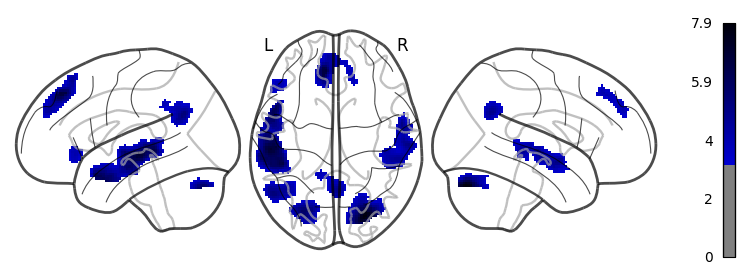

In [41]:

display = plotting.plot_glass_brain(entropy_dec_NK_K, display_mode = 'lzr', colorbar = True, threshold = 3.2, cmap= plotting.cm.black_blue_r) 


NameError: name 'entropy_dec_NK_K' is not defined

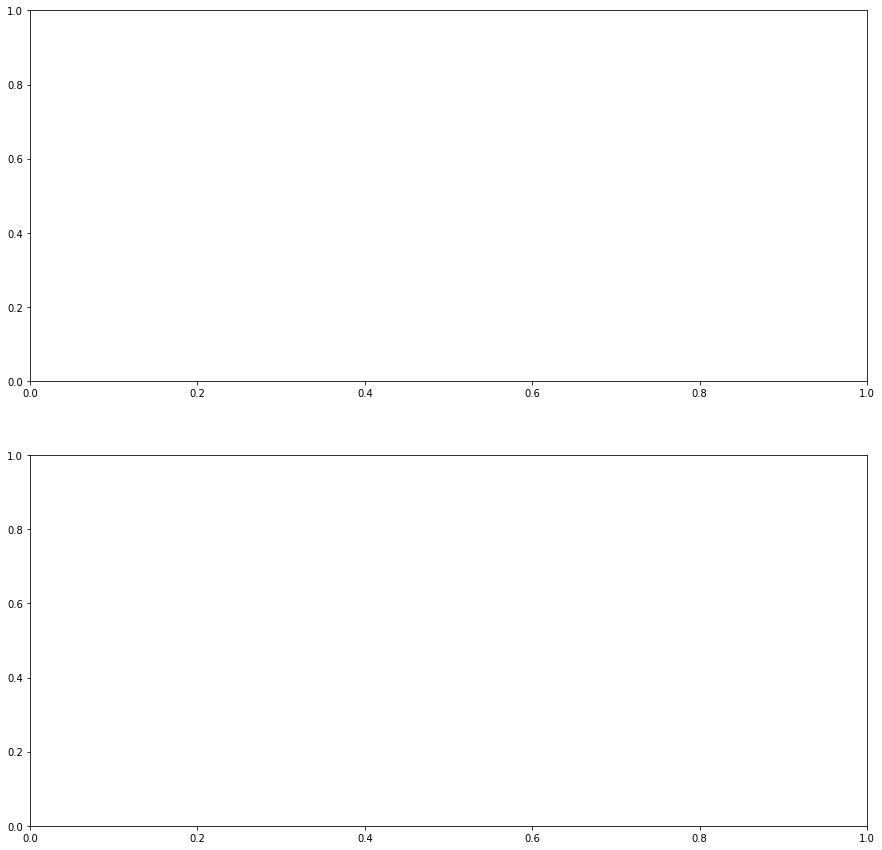

In [6]:

#init figure with 2 axes
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))

#plt.subplots_adjust(hspace = 0.02)

#plotting glass brain on first ax
plotting.plot_glass_brain(entropy_dec_NK_K, display_mode = 'lzry', colorbar = True, threshold = 3.2, cmap= plotting.cm.black_blue_r, axes = axes[0]) 

#plotting beta on second ax
my_color_palette = dict(zip(df.columns, ['#517ea0', 'blue'] * 4))

#f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (12, 9))

f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (12, 9), ax = axes[1])


sz = 15
header_sz = 17

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.set_ylabel("VOI eigenvariate",fontsize = sz)
contrast_axes.set_ylabel("Mean difference",fontsize = sz)

rawswarm_axes.set_xticklabels([ 'nonkey', 'key']*4, fontsize = sz)
contrast_axes.set_xticklabels(['','Δ key \n− nonkey']*4, fontsize = sz)
#contrast_axes.set_xticklabels(['','']*4)
#contrast_axes.set_xlabel('key minus nonkey')

rawswarm_axes.tick_params(axis = 'y', labelsize = 12)
contrast_axes.tick_params(axis = 'y', labelsize = 12)

header_positions = [0.125*(i+1) for i in range(0,8,2)]
for position, region in zip(header_positions, ['MTL_L', 'mPFC', 'AG_L', 'IFG_L']):
    #rawswarm_axes.text(position, 1, region, horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space
    axes[0].text(position, -0.2, region,horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space

#plt.tight_layout()

C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gffun\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\gffun\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\gffun\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


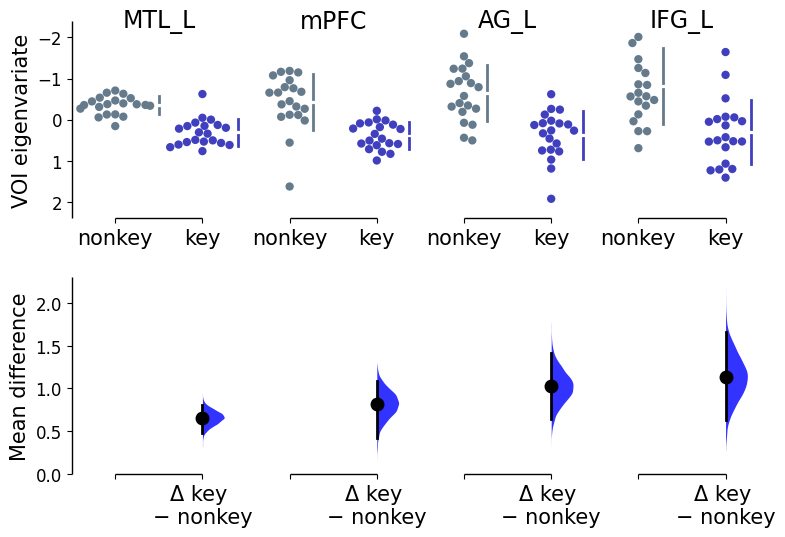

In [15]:
#plotting beta on second ax
my_color_palette = dict(zip(df.columns, ['#517ea0', 'blue'] * 4))

#f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (12, 9))

f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (9, 6))


sz = 15
header_sz = 17

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.set_ylabel("VOI eigenvariate",fontsize = sz)
contrast_axes.set_ylabel("Mean difference",fontsize = sz)

rawswarm_axes.set_xticklabels([ 'nonkey', 'key']*4, fontsize = sz)
contrast_axes.set_xticklabels(['','Δ key \n− nonkey']*4, fontsize = sz)
#contrast_axes.set_xticklabels(['','']*4)
#contrast_axes.set_xlabel('key minus nonkey')

rawswarm_axes.tick_params(axis = 'y', labelsize = 12)
contrast_axes.tick_params(axis = 'y', labelsize = 12)

header_positions = [0.125*(i+1) for i in range(0,8,2)]
for position, region in zip(header_positions, ['MTL_L', 'mPFC', 'AG_L', 'IFG_L']):
    rawswarm_axes.text(position, 1, region, horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space
    #axes[0].text(position, 1, region,horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space

plt.tight_layout()

In [27]:
df['id'] = df.index
all_VOI_paired = db.load(df, idx=[(df.columns[i], df.columns[i+1]) for i in range(0, len(df.columns), 2)], paired=True, id_col=df.id)

IndexError: index 9 is out of bounds for axis 0 with size 9

In [28]:
df

,MTL_L_nonkeyE,MTL_L_keyE,mPFC_nonkeyE,mPFC_keyE,AG_L_nonkeyE,AG_L_keyE,IFG_L_nonkeyE,IFG_L_keyE,id
0,-0.706716,0.200399,-1.075791,0.184241,-0.888706,0.027996,-1.256731,0.040313,0
1,-0.308074,0.221523,-0.111503,0.069984,0.078894,0.269070,-0.126634,-1.089100,1
2,0.159317,0.672597,0.562068,0.511599,0.443266,0.753520,0.696682,1.415017,2
3,-0.442109,0.495239,-0.959006,0.721455,-0.789876,0.733726,-2.013286,1.216620,3
4,-0.070125,-0.043103,0.022634,0.093620,-0.936687,0.133059,0.282097,-0.516597,4
5,-0.052907,0.344044,-0.067133,0.576026,-0.187783,0.088057,-0.567600,0.527727,5
6,-0.353160,0.536883,-0.262702,0.021003,-0.315713,0.582243,-0.563389,0.505689,6
7,-0.521063,0.507356,-0.448865,0.625243,-1.241388,0.119255,-0.477357,0.142455,7
8,-0.376153,0.158651,-0.116938,0.123820,0.126433,0.095072,-0.442067,-0.052628,8
9,-0.654232,0.001855,-1.163468,0.349401,-1.541474,-0.259905,-0.652984,0.053870,9


C:\Users\gffun\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gffun\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\gffun\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\gffun\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


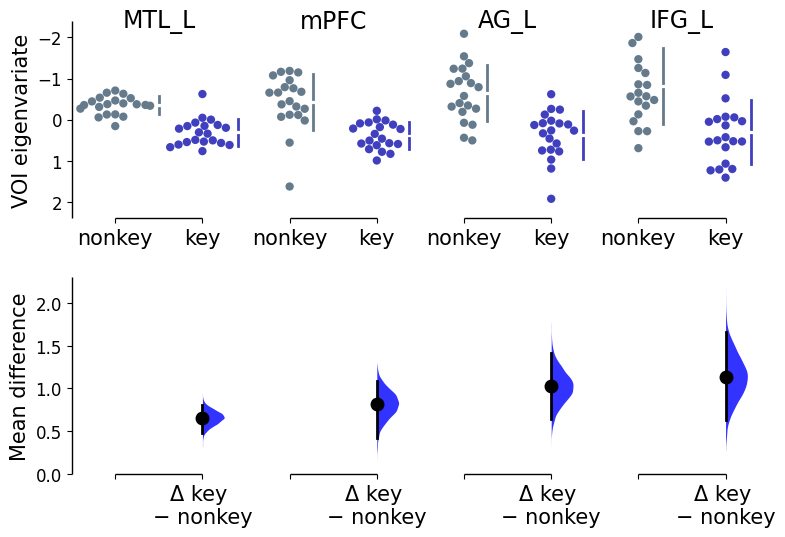

In [15]:
#plotting beta on second ax
my_color_palette = dict(zip(df.columns, ['#517ea0', 'blue'] * 4))

#f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (12, 9))

f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (9, 6))


sz = 15
header_sz = 17

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.set_ylabel("VOI eigenvariate",fontsize = sz)
contrast_axes.set_ylabel("Mean difference",fontsize = sz)

rawswarm_axes.set_xticklabels([ 'nonkey', 'key']*4, fontsize = sz)
contrast_axes.set_xticklabels(['','Δ key \n− nonkey']*4, fontsize = sz)
#contrast_axes.set_xticklabels(['','']*4)
#contrast_axes.set_xlabel('key minus nonkey')

rawswarm_axes.tick_params(axis = 'y', labelsize = 12)
contrast_axes.tick_params(axis = 'y', labelsize = 12)

header_positions = [0.125*(i+1) for i in range(0,8,2)]
for position, region in zip(header_positions, ['MTL_L', 'mPFC', 'AG_L', 'IFG_L']):
    rawswarm_axes.text(position, 1, region, horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space
    #axes[0].text(position, 1, region,horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space

plt.tight_layout()

## Figure 3

A: glass brain representation of activation differences associated with decrease in next-word entropy between key- and nonkey words (p = 0.001). Color indicates activation strength (T-values).
B: top: subject-wise eigenvariates for key- and nonkey words in each VOI. bottom: mean difference in eigenvariates between key- and nonkey words in each VOI. MTL_L : left mid-temporal lobe; mPFC: mid-prefrontal cotex; AG_L: left angular gyrus; IFG_L : inferior frontal gyrus.